In [8]:
import requests

API_KEY = "lphavantage key"
STOCK_SYMBOL = "AAPL"
URL = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={STOCK_SYMBOL}&interval=5min&apikey={API_KEY}"

response = requests.get(URL)
data = response.json()

print(data)  # Print the stock price data


{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-02-21 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2025-02-21 19:55:00': {'1. open': '245.0200', '2. high': '245.1000', '3. low': '245.0000', '4. close': '245.0300', '5. volume': '3692'}, '2025-02-21 19:50:00': {'1. open': '245.1000', '2. high': '245.1100', '3. low': '245.0000', '4. close': '245.0937', '5. volume': '2064'}, '2025-02-21 19:45:00': {'1. open': '245.1500', '2. high': '245.1500', '3. low': '245.0800', '4. close': '245.0800', '5. volume': '1043'}, '2025-02-21 19:40:00': {'1. open': '245.1600', '2. high': '245.1600', '3. low': '245.0937', '4. close': '245.1600', '5. volume': '1662'}, '2025-02-21 19:35:00': {'1. open': '245.1000', '2. high': '245.1975', '3. low': '245.0900', '4. close': '245.1500', '5. volume': '5882'}, '2025-02-21 19:30:00': {'1. open': '245.1200',

**AI Model for Market Sentiment Analysis**

**Goal:** Train an NLP model to analyze financial news sentiment.

In [9]:
pip install transformers torch requests beautifulsoup4


**Use a Pretrained AI Model for Sentiment Analysis**

In [11]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
result = sentiment_pipeline("Apple's earnings report shows a 20% increase in revenue.")

print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9979544878005981}]


In [14]:
import requests
from transformers import pipeline

# Replace with your NewsAPI Key
NEWS_API_KEY = "c4a23f61976b4bc4bcfb21e57aa2d85c"

# Function to fetch financial news
def get_financial_news(query="stocks"):
    url = f"https://newsapi.org/v2/everything"
    params = {
        "q": query,
        "language": "en",
        "sortBy": "publishedAt",
        "apiKey": NEWS_API_KEY
    }

    response = requests.get(url, params=params) # Pass params to the request
    data = response.json()

    if data.get("status") == "ok" and "articles" in data:  # Check for 'status' and 'articles'
        return [(article["title"], article["description"]) for article in data["articles"][:5]]
    else:
        return f"Error fetching news: {data}"

# Load AI Model for Sentiment Analysis
sentiment_pipeline = pipeline("sentiment-analysis")

# Fetch & Analyze Financial News
news_articles = get_financial_news("stock market")
print("\n🔹 Latest Financial News & Sentiment Analysis 🔹\n")

if isinstance(news_articles, str) and news_articles.startswith("Error fetching news:"): # Check if news_articles is an error message
    print(news_articles) # Print the error message if there was one
else: # Only proceed if there was no error
    for title, description in news_articles:
        sentiment = sentiment_pipeline(title + ". " + description)[0]
        print(f"📰 {title}")
        print(f"💬 Sentiment: {sentiment['label']} (Confidence: {round(sentiment['score'], 2)})\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0



🔹 Latest Financial News & Sentiment Analysis 🔹

📰 Every Palantir Investor Should Keep an Eye on This Number - Nasdaq
💬 Sentiment: NEGATIVE (Confidence: 1.0)

📰 ASX 200 data centre stock sinks 5% to a 52-week low on results day
💬 Sentiment: NEGATIVE (Confidence: 1.0)

📰 NIB share price rallies 11% as FY25 'shows strong core business'
💬 Sentiment: NEGATIVE (Confidence: 0.99)

📰 With a 59% stake, Bhagwan Marine Limited (ASX:BWN) insiders have a lot riding on the company
💬 Sentiment: POSITIVE (Confidence: 1.0)

📰 WiseTech Board Quits as Founder White Wins Power Struggle
💬 Sentiment: NEGATIVE (Confidence: 0.9)



**Predicting Stock Price Trends Using AI**

**Goal:** Train an AI model to predict stock prices using historical data.

In [15]:
pip install numpy pandas matplotlib scikit-learn tensorflow yfinance


**Train an LSTM Model for Stock Price Prediction**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch stock data (e.g., Apple 'AAPL') from Yahoo Finance
def get_stock_data(symbol, start="2020-01-01", end="2024-01-01"):
    stock = yf.download(symbol, start=start, end=end)
    return stock["Close"]

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-02-21 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2025-02-21 19:55:00': {'1. open': '245.0200', '2. high': '245.1000', '3. low': '245.0000', '4. close': '245.0300', '5. volume': '3692'}, '2025-02-21 19:50:00': {'1. open': '245.1000', '2. high': '245.1100', '3. low': '245.0000', '4. close': '245.0937', '5. volume': '2064'}, '2025-02-21 19:45:00': {'1. open': '245.1500', '2. high': '245.1500', '3. low': '245.0800', '4. close': '245.0800', '5. volume': '1043'}, '2025-02-21 19:40:00': {'1. open': '245.1600', '2. high': '245.1600', '3. low': '245.0937', '4. close': '245.1600', '5. volume': '1662'}, '2025-02-21 19:35:00': {'1. open': '245.1000', '2. high': '245.1975', '3. low': '245.0900', '4. close': '245.1500', '5. volume': '5882'}, '2025-02-21 19:30:00': {'1. open': '245.1200',

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.12.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch stock data (e.g., Apple 'AAPL') from Yahoo Finance
def get_stock_data(symbol, start="2020-01-01", end="2024-01-01"):
    stock = yf.download(symbol, start=start, end=end)
    return stock["Close"]

# Prepare data for LSTM model
def prepare_data(data, time_step=50):
    scaler = MinMaxScaler(feature_range=(0,1))
    data_scaled = scaler.fit_transform(np.array(data).reshape(-1,1))

    X, Y = [], []
    for i in range(len(data_scaled)-time_step-1):
        X.append(data_scaled[i:(i+time_step), 0])
        Y.append(data_scaled[i + time_step, 0])

    X, Y = np.array(X), np.array(Y)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM
    return X, Y, scaler

from tensorflow.keras.layers import LSTM

def build_lstm_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(50,1), activation='tanh', recurrent_activation='sigmoid', unroll=True),
        Dropout(0.2),
        LSTM(50, return_sequences=False, activation='tanh', recurrent_activation='sigmoid', unroll=True),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

# Main Execution
stock_symbol = "AAPL"
print(f"Fetching stock data for {stock_symbol}...")
stock_data = get_stock_data(stock_symbol)

# Split data into training and testing
train_size = int(len(stock_data) * 0.8)
train_data, test_data = stock_data[:train_size], stock_data[train_size:]

# Prepare datasets
X_train, Y_train, scaler = prepare_data(train_data)
X_test, Y_test, _ = prepare_data(test_data)

# Train the model
print("Training LSTM model...")
model = build_lstm_model()
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=1)



[*********************100%***********************]  1 of 1 completed

Fetching stock data for AAPL...
Training LSTM model...


Epoch 1/50
48/48 [==============================] - 15s 17ms/step - loss: 0.0299
Epoch 2/50
48/48 [==============================] - 1s 17ms/step - loss: 0.0034
Epoch 3/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0028
Epoch 4/50
48/48 [==============================] - 1s 19ms/step - loss: 0.0030
Epoch 5/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 6/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 7/50
48/48 [==============================] - 1s 19ms/step - loss: 0.0030
Epoch 8/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 9/50
48/48 [==============================] - 1s 19ms/step - loss: 0.0029
Epoch 10/50
48/48 [==============================] - 1s 23ms/step - loss: 0.0021
Epoch 11/50
48/48 [==============================] - 1s 26ms/step - loss: 0.0024
Epoch 12/50
48/48 [==============================] - 1s 28ms/step - loss: 0.0024
Epoch 13/50
48/48 [=================

In [4]:
# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert scaling for predicted values
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

5/5 [==============================] - 0s 12ms/step
Train RMSE: 3.3740125551867313
Test RMSE: 7.945025190681011


5/5 [==============================] - 0s 9ms/step


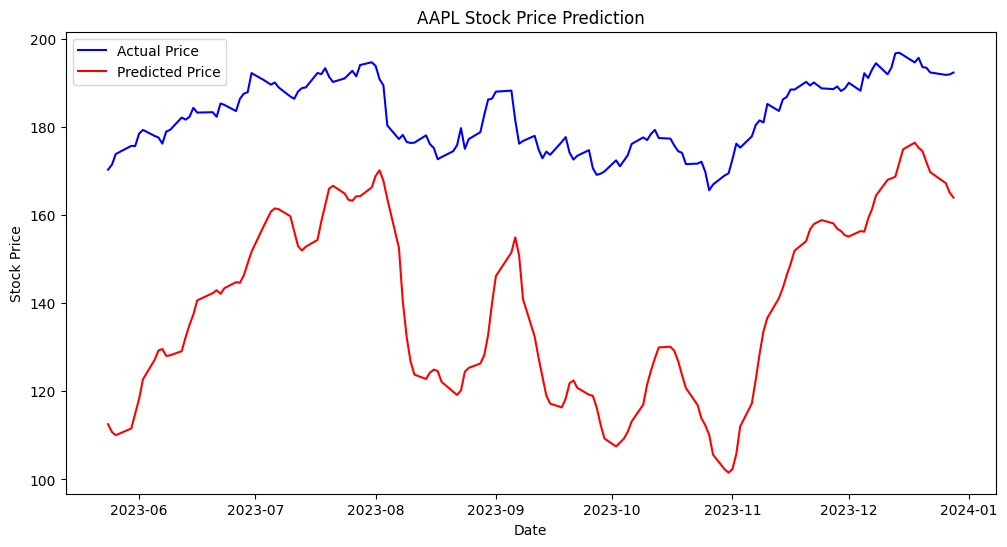

In [6]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale

# Plot results
plt.figure(figsize=(12,6))
plt.plot(stock_data.index[train_size+50:train_size+50+len(predictions)], test_data[50:50+len(predictions)], label="Actual Price", color="blue") # Adjust the x-axis range
plt.plot(stock_data.index[train_size+50:train_size+50+len(predictions)], predictions, label="Predicted Price", color="red") # Adjust the x-axis range
plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.show()

In [7]:

model.save('/content/drive/MyDrive/APPLICATION/Stock_Prediction_Model.h5')
